In [113]:
import pymysql.cursors

config = {
    'host': '9.59.150.218',
    'port': 3306, 
    'user': 'iboost',
    'password': 'passw0rd',
    'db': 'BOOSTDB'
}

# config = {
#     'host': '127.0.0.1',
#     'port': 3306, 
#     'user': 'root',
#     'password': 'xuhengda',
#     'db': 'BOOSTDB'
# }

cnx = pymysql.connect(**config)

print(cnx)

# [前端] 把csv文件存入数据库
* 写UTTERANCES表

In [114]:
import csv

bot_id = '0'
# cnx = mysql.connector.connect(**config)
cnx = pymysql.connect(**config)
cursor = cnx.cursor()
csv_file = 'chat.csv'
with open(csv_file, encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',')
    file = list(reader)
    
l = 0
for l in range(0, len(file), 5000):
    a = file[l:l+5000]
    print(l, l+5000, len(a))
    sql = 'INSERT INTO CLUSTERRING_UTTERANCES (BOT_ID, CONV_ID, SPEAKER_ID, UTTERANCE) VALUES'
    sql_values = ' (%s, %s, %s, %s),' * len(a)
    sql += sql_values[:-1]
    data = []
    for conv_id, speaker_id, utterance in a:
        data.extend([bot_id, int(conv_id), int(speaker_id), utterance])
    cursor.execute(sql, data)
    cnx.commit()
    
cursor.close()
cnx.close()

0 5000 5000
5000 10000 5000
10000 15000 5000
15000 20000 5000
20000 25000 5000
25000 30000 5000
30000 35000 5000
35000 40000 5000
40000 45000 5000
45000 50000 5000
50000 55000 5000
55000 60000 5000
60000 65000 5000
65000 70000 5000
70000 75000 5000
75000 80000 5000
80000 85000 5000
85000 90000 5000
90000 95000 5000
95000 100000 5000
100000 105000 5000
105000 110000 5000
110000 115000 5000
115000 120000 5000
120000 125000 863


# [前端] 注册BOT_ID
* 写BOTS表

In [115]:
# cnx = mysql.connector.connect(**config)
cnx = pymysql.connect(**config)
bot_id = '0'
cursor = cnx.cursor()
sql = 'INSERT INTO CLUSTERRING_TASKS (BOT_ID) VALUES (%s)'
data = (bot_id,)
cursor.execute(sql, data)
cnx.commit()
cursor.close()
cnx.close()

# [前端] 发送请求

In [130]:
import urllib.parse, urllib.request
import json
import time

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

url = 'http://localhost:8080/cluster'

data = {
    'bot_id': '0',
    'stop_words': [],
    'max_df': 0.1,
    'min_df': 20,
    'n_clusters': 50,
    'method': 'kmeans'
}

data = json.dumps(data).encode('utf8')
headers = {'content-type': 'application/json'}
req = urllib.request.Request(url, data=data, headers=headers)

result = urllib.request.urlopen(req).read().decode()
print(result)


{"status": "successful"}


In [131]:
def query():
    cnx = cnx = pymysql.connect(**config)
    bot_id = '0'
    cursor = cnx.cursor()
    sql = 'SELECT IS_COMPLETED, PROGRESS FROM CLUSTERRING_TASKS WHERE BOT_ID = %s'
    data = (bot_id,)
    cursor.execute(sql, data)
    c, p = cursor.fetchone()
    is_completed = True if int(c) == 1 else False
    cursor.close()
    cnx.close()
    return is_completed

start = time.time()
while True:
    is_completed = query()
    if not is_completed:
        print(is_completed, '%.2fs' % (time.time() - start))
        time.sleep(2)
    else:
        print(is_completed, '%.2fs' % (time.time() - start))
        break

True 1.78s


# [前端] 读DF
* 读WORDS表

total words: 1000
文件频率df-词数


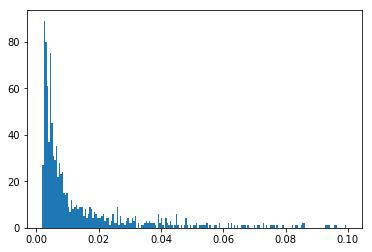

每个词的文件频率df


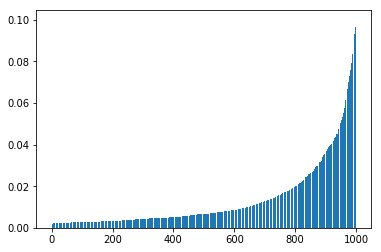

In [132]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

cnx = pymysql.connect(**config)
cursor = cnx.cursor()
sql = 'SELECT DF FROM CLUSTERRING_WORDS WHERE BOT_ID = %s ORDER BY DF ASC'
data = (bot_id,)
cursor.execute(sql, data)
df = list(map(lambda t: float(t[0]), cursor))
cursor.close()
cnx.close()

print('total words:', len(df))

print('文件频率df-词数')
plt.hist(df, 200)
plt.show()

print('每个词的文件频率df')
df.sort()
plt.bar(np.arange(len(df)), df)
plt.show()

# [前端] 查询CH指数
* 读BOTS表

In [133]:
cnx = pymysql.connect(**config)
cursor = cnx.cursor()
sql = 'SELECT CH FROM CLUSTERRING_TASKS WHERE BOT_ID = %s'
data = (bot_id,)
cursor.execute(sql, data)
ch = float(cursor.fetchone()[0]) 
cursor.close()
cnx.close()

print('CH: %.3f' % ch)

CH: 47.554


# [前端] 查询每个簇中对话的数量
* 读CLUSTERS表

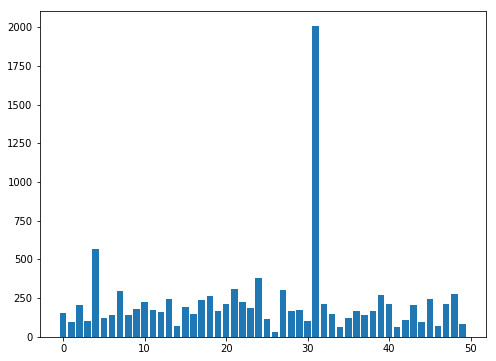

In [134]:
cnx = pymysql.connect(**config)
n_clusters = 50 # 参数

cursor = cnx.cursor()
sql = 'SELECT VOLUME FROM CLUSTERRING_CLUSTERS WHERE BOT_ID = %s'
data = (bot_id,)
cursor.execute(sql, data)
volumes = [vol for (vol,) in cursor]
cursor.close()
cnx.close()

plt.figure(figsize=(8, 6))
plt.bar(range(n_clusters), volumes)
plt.show()

# [前端] 展示每个簇的关键词
* 联合查询CLUSTER_KEYWORDS和WORDS

cluster #0: 师傅 提前 稍等一下 收货 签收 这面 通知 方便 协商 接到 家里 取件 畅通 保持 前会 下午 确认 知道 短信 送来 送到 催下



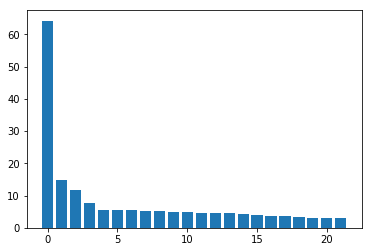

cluster #1: 抬头 税号 发票 修改 公司 电子 组织 机构 换开 下载 明细 开具 工作日 添加 内容 开票 查看 财务 更改 名称 改成 短信



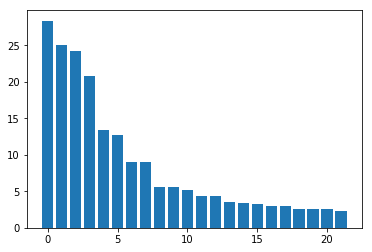

cluster #2: 工作日 储蓄卡 微信 信用卡 零钱 支付 白条 时效 余额 退回 现金支付 差价 返还 账户 两个 红包 30 周期 银行 注意 审核 返回



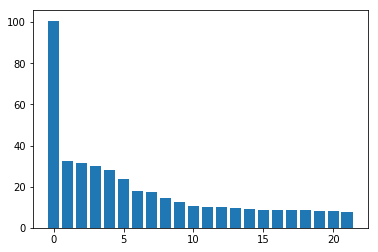

cluster #3: 返还 回复 之后 原路 款项 拒收 查收 一直 删除 工作日 跟进 我会 多个 一对一 消息 财务 放心 退回来 拦截 还要 成功 乐意



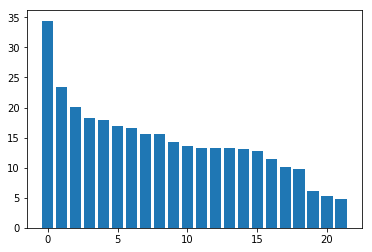

cluster #4: 送到 无法 催促 包裹 返回 安排 确定 帮助 带来 不便 具体 仓库 见谅 之后 更好 保证 拒签 收货 一定 两个 知道 应该



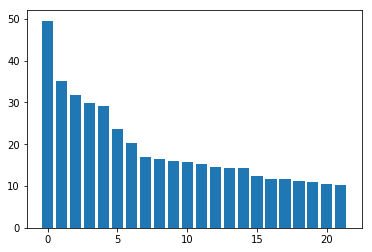

In [135]:
cnx = pymysql.connect(**config)
cursor = cnx.cursor()
sql = ('SELECT CLUSTERRING_WORDS.WORD, CLUSTERRING_CLUSTERKEYWORDS.TFIDF '
       'FROM CLUSTERRING_CLUSTERKEYWORDS INNER JOIN CLUSTERRING_WORDS '
       'WHERE CLUSTERRING_CLUSTERKEYWORDS.WORD_ID = CLUSTERRING_WORDS.WORD_ID '
       'AND CLUSTERRING_WORDS.BOT_ID = %s AND CLUSTERRING_CLUSTERKEYWORDS.BOT_ID = CLUSTERRING_WORDS.BOT_ID '
       'AND CLUSTER_ID = %s '
       'ORDER BY CLUSTERRING_CLUSTERKEYWORDS.TFIDF DESC')

for cluster_id in range(5):
    data = (bot_id, cluster_id)
    cursor.execute(sql, data)

    words = []
    values = []
    for word, value in cursor:
        words.append(word)
        values.append(float(value))

    num = 22
    print('cluster #%d:' % cluster_id, ' '.join(words[:num]), end='\n\n')
    plt.bar(range(num), values[:num])
    plt.show()
cursor.close()
cnx.close()

# [前端] 查看指定簇
* 联合查询CLUSTER_KEYWORDS和WORDS
* 联合查询CONVS和UTTERANCES

cluster #4: 送到 无法 催促 包裹 返回 安排 确定 帮助 带来 不便 具体 仓库 见谅 之后 更好 保证 拒签 收货 一定 两个 知道 应该



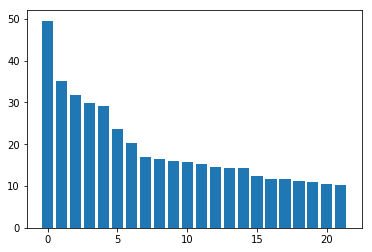

ok

1 请问您是咨询之前的问题还是有其他的问题需要处理呢?
0 我买的酒壶盖子坏了，后来售后送来[数字x]次都是坏的 怎么办，我已经再次申请换货了
1 换新的还是有问题是吗 建议您考虑商品的退呢
0 送来[数字x]次都是盖子坏的
1 很抱歉给您带来不便
0 只能看看明天送来的坏不坏了对么
1 给您带来不便了亲 您关注下哈
0 嗯嗯
1 #E-s[数字x] 请问还有其他还可以帮到您的吗?
0 没了，谢谢

1 有什么问题我可以帮您处理或解决呢?
0 我没有收到铝合金气门 就一个轮胎
1 亲爱的客户，还麻烦您提供下订单号，妹子这边给您查询哦~
0 [ORDERID_10002538]
1 您收到几个包裹呢
0 一个 就一个轮胎包裹
1 我联系站点
0 OK
1 显示分两个包裹
0 我就就看着维修工人把轮胎打开了
1 我已经联系站点了
0 OK
1 请问还有其他还可以帮到您的吗?
0 没了
1 感谢您对京东的支持，祝您生活愉快，再见!
0 啥时候给我答复
1 站点会查询的 正常今天会处理的
0 OK
1 #E-s[数字x]#E-s[数字x]
0 谢谢

1 马上核实情况，请您稍等哈#E-s[数字x]
0 我这边有点急
1 石家庄[地址x]。
0 对
1 #E-s[数字x]#E-s[数字x]
0 我想查询订单的配送信息
1 #E-s[数字x]#E-s[数字x]配送中了哦
0 我知道
1 #E-s[数字x]您先等待哦，会尽快安排呢
0 好的

1 有什么问题我可以帮您处理或解决呢?
0 下单时间:[日期x] 可否今天送到
1 [日期x]
0 ……这不是忘记改了吗 所以才找你客服的呢 能不能帮我改今天送到
1 亲，及那天送不到的 我们是上午出库的
0 今天送不到吗
1 是的，亲 明天送达的
0 好吧 没事了



In [138]:
cnx = pymysql.connect(**config)
cursor = cnx.cursor()

cluster_id = 4

sql = ('SELECT CLUSTERRING_WORDS.WORD, CLUSTERRING_CLUSTERKEYWORDS.TFIDF '
       'FROM CLUSTERRING_CLUSTERKEYWORDS INNER JOIN CLUSTERRING_WORDS '
       'WHERE CLUSTERRING_CLUSTERKEYWORDS.WORD_ID = CLUSTERRING_WORDS.WORD_ID '
       'AND CLUSTERRING_WORDS.BOT_ID = %s AND CLUSTERRING_CLUSTERKEYWORDS.BOT_ID = CLUSTERRING_WORDS.BOT_ID '
       'AND CLUSTER_ID = %s '
       'ORDER BY CLUSTERRING_CLUSTERKEYWORDS.TFIDF DESC')
data = (bot_id, cluster_id)
cursor.execute(sql, data)

words = []
values = []
for word_id, value in cursor:
    words.append(word_id)
    values.append(float(value))

num = 22
print('cluster #%d:' % cluster_id, ' '.join(words[:num]), end='\n\n')
plt.bar(range(num), values[:num])
plt.show()

print('ok')

sql = ('SELECT CLUSTERRING_CONVS.CONV_ID, SPEAKER_ID, UTTERANCE '
       'FROM CLUSTERRING_CONVS INNER JOIN CLUSTERRING_UTTERANCES '
       'WHERE CLUSTERRING_CONVS.BOT_ID = %s AND CLUSTERRING_UTTERANCES.BOT_ID = CLUSTERRING_CONVS.BOT_ID '
       'AND CLUSTERRING_CONVS.CONV_ID = CLUSTERRING_UTTERANCES.CONV_ID '
       'AND CLUSTER_ID = %s')
data = (bot_id, cluster_id)
cursor.execute(sql, data)

last_conv_id = None
conv = ''
count = 0
for conv_id, speaker_id, utterance in cursor:
    if conv_id == last_conv_id:
        conv += str(speaker_id) + ' ' + utterance + '\n'
    else:
        print(conv)
        last_conv_id = conv_id
        conv = ''
        count += 1
        if count >= 5:
            break

cursor.fetchall()
cursor.close()
cnx.close()